# 1. Business Problem

## 1.1 Problem Description

We have to do an Exploratory Data Analysis on the given dataset, feature selection, data preprocessing before training a model for Binary Classification.

## 1.2 Problem Statement

In the given dataset the challange is to build a model for Binary Classification and we will be using various Machine Learning algorithm from basic to advance to see which algorithm suits our model the best.

## 1.3 Business Metric 

We will be using Accuracy and AUC Score for evaluating our models.

# 2. Importing Important Libraries and Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# importing train and test csv file
train = pd.read_csv("training_set.csv")
test = pd.read_csv("test_set.csv")

train = train.drop(["Unnamed: 0"], axis = 1)
test = test.drop(["Unnamed: 0"], axis = 1)

print("Train Dataset Shape :", train.shape)
print("Test Dataset Shape :", test.shape)

Train Dataset Shape : (3910, 58)
Test Dataset Shape : (691, 57)


In [3]:
# checking train csv file
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [7]:
# checking test csv file
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


## 2.1 Checking for Null Values

In [8]:
#Checking nul values in train and test csv file
print("Null Values in Train Dataset :", train.isna().sum().sum())
print("Null Values in Test Dataset :", test.isna().sum().sum())

Null Values in Train Dataset : 0
Null Values in Test Dataset : 0


# 3. Data Splitting

In [9]:
# splitting the train dataset in train and validation dataset in 4:1 ratio respectively

X_train, X_valid, y_train, y_valid  = train_test_split(train.drop(["Y"], axis = 1).values, train["Y"].values, 
                                                       test_size = 0.2, random_state = 33, stratify = train["Y"].values)

X_test = test.copy()

print("Train Dataset Shape :", X_train.shape)
print("Validation Dataset Shape :", X_valid.shape)
print("Test Dataset Shape :", X_test.shape)

print("\ny_train length :",len(y_train))
print("y_valid length :",len(y_valid))

Train Dataset Shape : (3128, 57)
Validation Dataset Shape : (782, 57)
Test Dataset Shape : (691, 57)

y_train length : 3128
y_valid length : 782


# 4. Exploratory Data Analysis (EDA)

## 4.1  Distribution of 'Y' output 

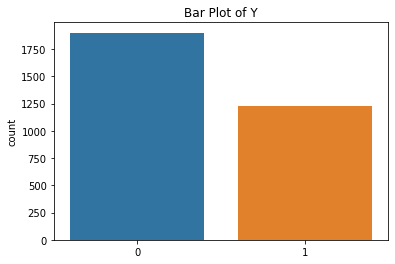

In [10]:
# plotting bar plot of 'Y'
sns.countplot(y_train)
plt.title('Bar Plot of Y')
plt.show()

We can observe that the output "Y" is little imbalanced. So, we will be using AUC Score to evaluate our model properly.

## 4.2 Univarient Analysis of Each Features

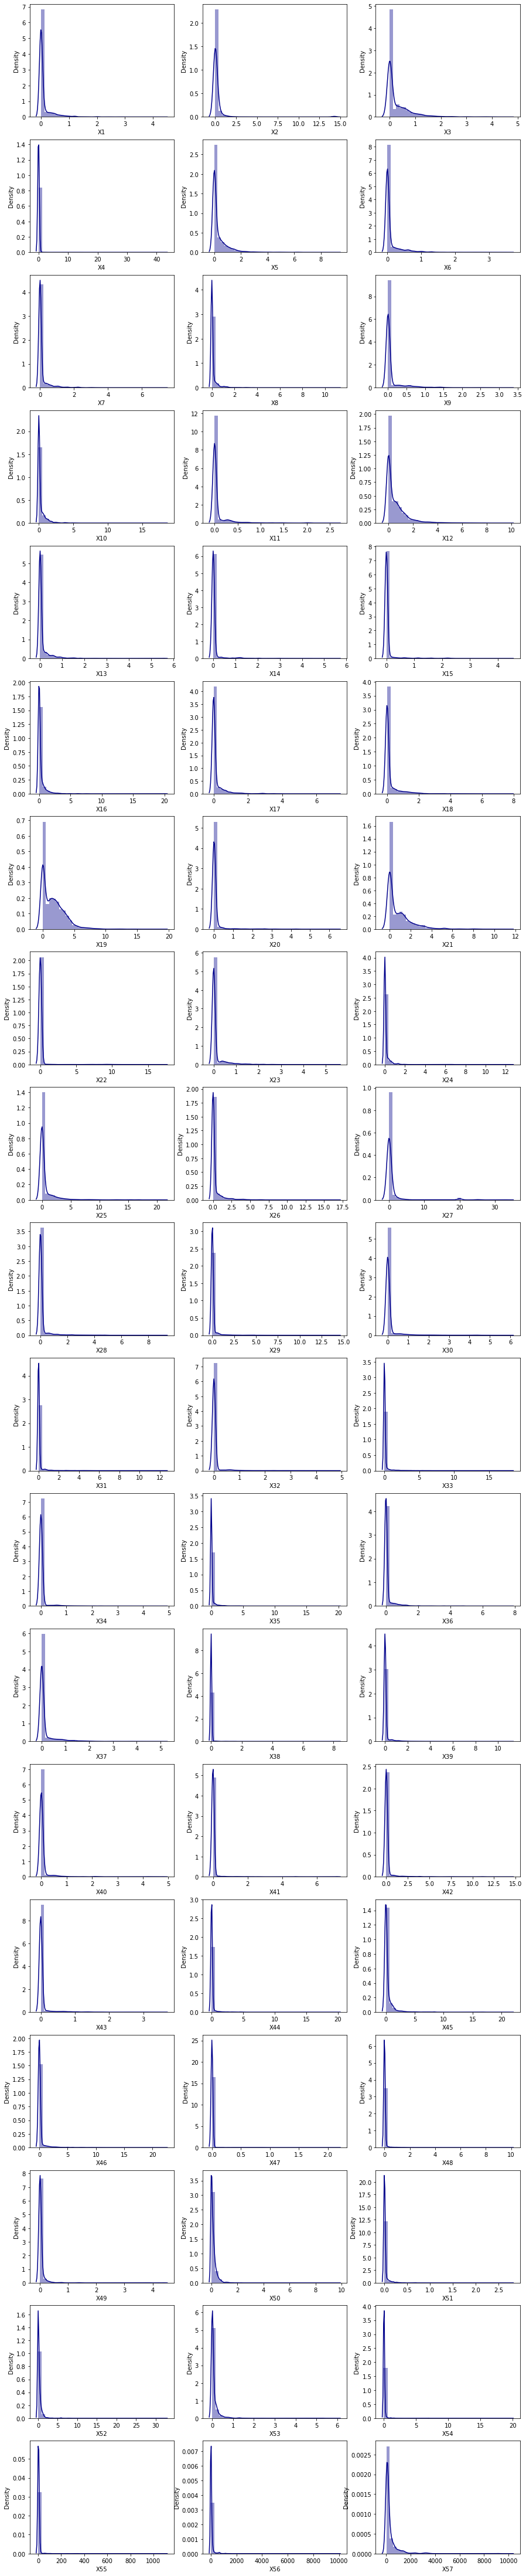

In [11]:
# plotting pdf with histogram for each feature
rows = 19
columns = 3
fig,ax = plt.subplots(nrows=19,ncols=3,figsize=(15,80))
for i in range(rows):
    for j in range(columns):
        sns.distplot(train['X'+str(i*3+j+1)], kde=True, bins=int(180/5), ax = ax[i][j], color = 'darkblue')

From the above graphs We can observe that the output most of the features is very skewed and we can also observe that most of the values of features are Zero.

## 4.3 Checking Sparsity of Dataset

In [12]:
row, column = X_train.shape
non_zero_count = np.count_nonzero(X_train)
print("The Sparsity of Train Dataset is : {} %".format((1 - non_zero_count/(row*column))*100))

The Sparsity of Train Dataset is : 77.39096782877911 %


As we can observe that 77.06% sparsity in training dataset is very high. So we can remove the features which has high sparsity as the sparse feature can introduce noise in training model which could negatively impacts our models.

## 4.4 Visualizing Variance of Features using PCA

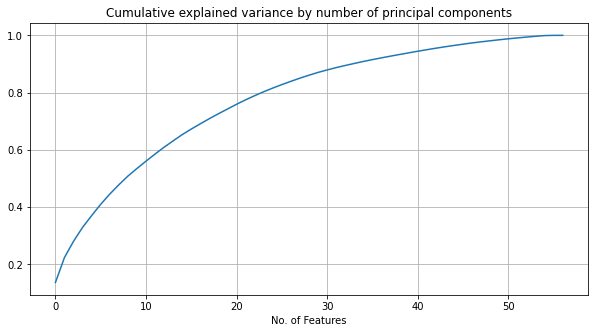

In [14]:
# plotting variance of features using PCA
scaler = MinMaxScaler()
X_train_normalize = scaler.fit_transform(X_train)

pca_model = PCA()
X_train_pca = pca_model.fit(X_train_normalize)

plt.figure(figsize = (10, 5))
plt.plot(X_train_pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative explained variance by number of principal components')
plt.xlabel("No. of Features")
plt.grid()
plt.show()

We can observe that first 40 features contains approximately 85% of the variance, while rest 17 features are needed to describe total 100% of variance.

## 4.5 Visualizing Train Dataset using T-SNE

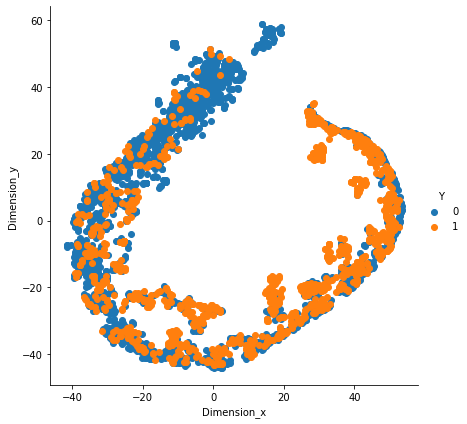

In [15]:
# training the T-SNE visualization model
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
tsne_model = tsne.fit_transform(X_train)

# creating a new data frame which help us in ploting the result data
tsne_df = pd.DataFrame()
tsne_df['Dimension_x'] = tsne_model[:,0]
tsne_df['Dimension_y'] = tsne_model[:,1]
tsne_df['Y'] = y_train

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue="Y", size=6).map(plt.scatter, 'Dimension_x', 'Dimension_y').add_legend()
plt.show()

We can see that one major cluster is formed which is little seperated with '0' on one side and '1' on the other, there is also some overlapping between the two class. So T-SNE plot show that there is definitely some seperation between two the classes.

# 5. Feature Selection

We will be using different methods for feature selection.

First we will be droping features which has very high Correlation with each other.

Then, we will be droping features which are highly sparse.

At last we will be selecting important features using Decision Tree Algorithm.

## 5.1 Dropping Highly Correlated Features

Text(0.5, 1.0, 'Correlation between Multiple Featues in Training Dataset')

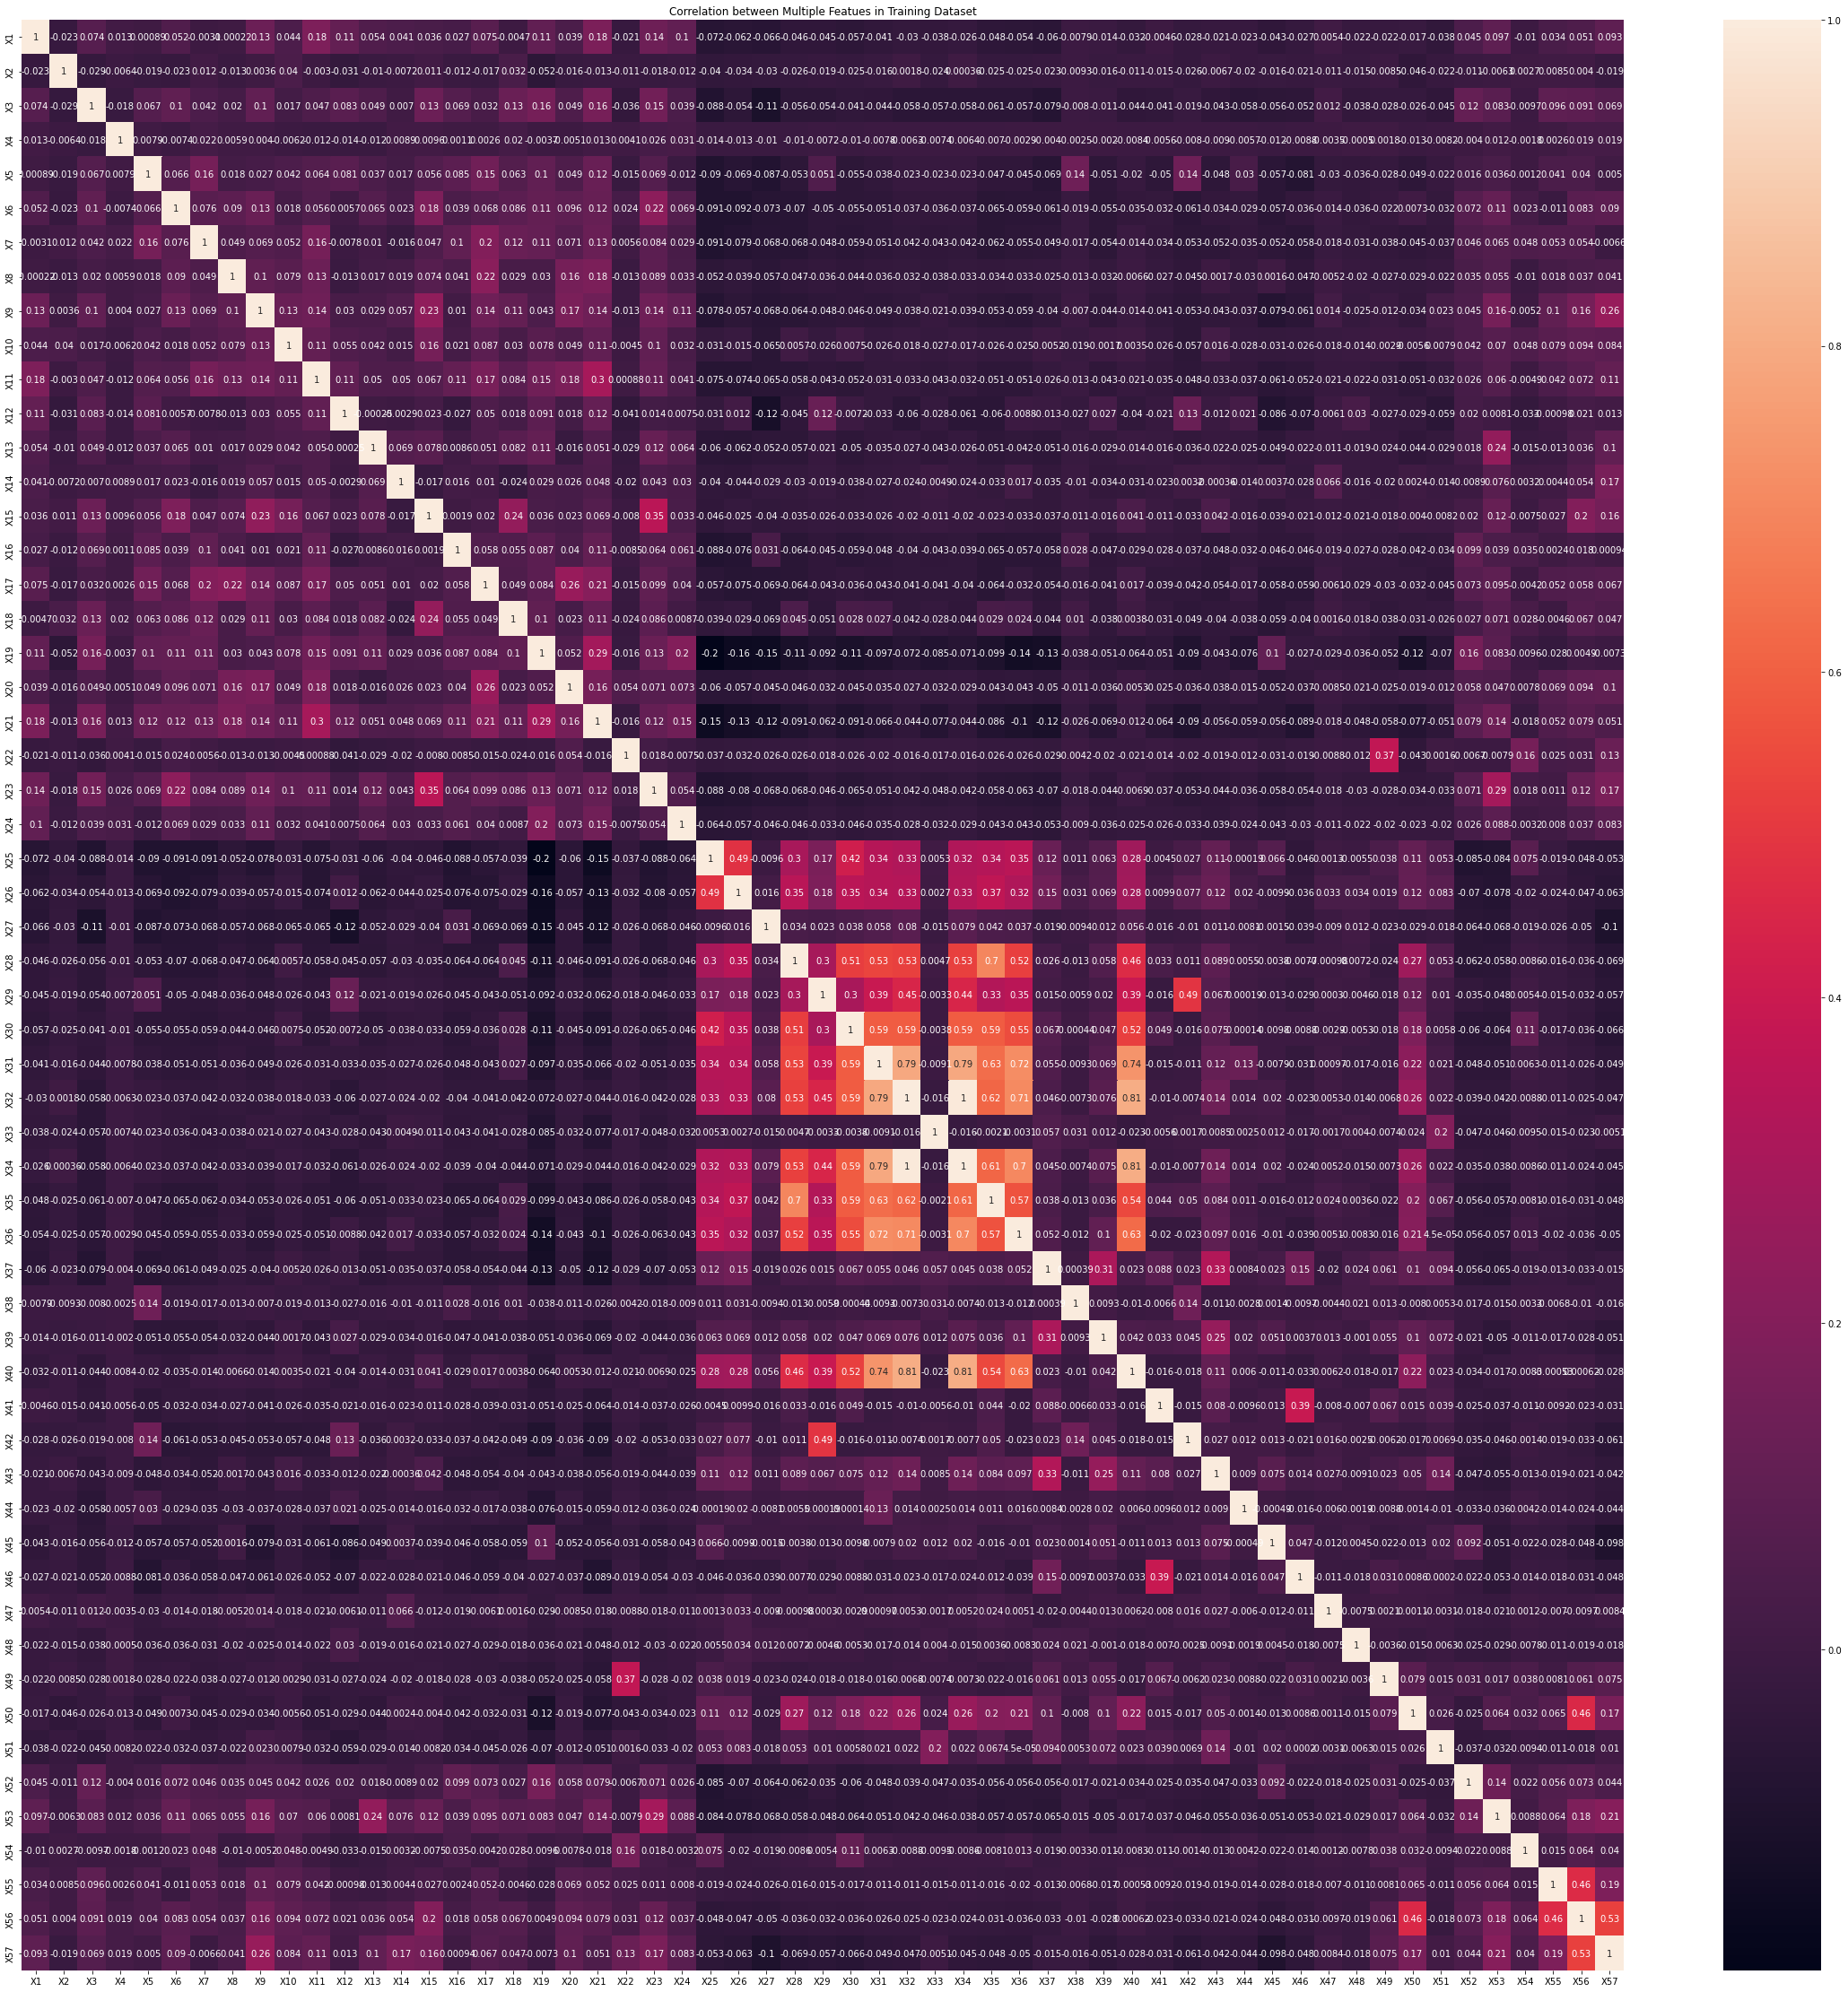

In [16]:
# plotting the correlation heatmap for visualising the relationship between the various features
X_train_df = pd.DataFrame(X_train, columns = ["X"+str(i) for i in range(1,58)])
X_valid_df = pd.DataFrame(X_valid, columns = ["X"+str(i) for i in range(1,58)])

plt.figure(figsize = (40,40))
cor = X_train_df.corr()
sns.heatmap(cor, annot = True)
plt.title('Correlation between Multiple Featues in Training Dataset')

From the above Correlation Heat Map we can observe that feature :

1. X32 and X34 are perfectly correlated with each other. 
2. X32 and X40 are highly correlated with about 81%
3. X32 and X31 are highly correlated with about 79%
4. X32 and X36 are highly correlated with abour 71%

As the features which are highly correlated or perfectly correlated can decrease the performance of the model and the corellated features also doesn't provide any additional information to the model. So, we can drop one highly corellated feature i.e. we will be droping X32, X34 feature.

In [17]:
# dropping the 'X32' and 'X34' features
X_train_df = X_train_df.drop(["X32", "X34"], axis = 1)
X_valid_df = X_valid_df.drop(["X32", "X34"], axis = 1)
X_test = test.drop(["X32", "X34"], axis = 1)

print("Train Dataset Shape :", X_train_df.shape)
print("Test Dataset Shape :", X_test.shape)

Train Dataset Shape : (3128, 55)
Test Dataset Shape : (691, 55)


## 5.2 Removing Sparse Feature 

In [18]:
# removig the highly sparse feature 
columns = X_train_df.columns
sparse_df = pd.DataFrame()
sparse_df['Features'] = columns
non_zero = []
for i in columns:
    non_zero_values = np.count_nonzero(X_train_df[i].values)
    non_zero.append((non_zero_values/len(X_train_df))*100)
sparse_df['Sparsity in %'] = non_zero
sparse_df.sort_values(by = 'Sparsity in %', ascending = False)

,Features,Sparsity in %
54,X57,100.000000
53,X56,100.000000
52,X55,100.000000
18,X19,70.524297
47,X50,59.526854
20,X21,52.909207
11,X12,51.182864
49,X52,48.433504
2,X3,40.696931
4,X5,37.915601


As we can observe that feature X57, X56 and X55 is having 100% sparsity i.e. all the three features contains only Zero.

So, we can drop these features as it has no nonzero value.

In [19]:
# dropping the 'X57', 'X56' and 'X55' features
X_train_df = X_train_df.drop(["X57", "X56", "X55"], axis = 1)
X_valid_df = X_valid_df.drop(["X57", "X56", "X55"], axis = 1)
X_test = X_test.drop(["X57", "X56", "X55"], axis = 1)

print("Train Dataset Shape :", X_train_df.shape)
print("Validation Dataset Shape :", X_valid_df.shape)
print("Test Dataset Shape :", X_test.shape)

Train Dataset Shape : (3128, 52)
Validation Dataset Shape : (782, 52)
Test Dataset Shape : (691, 52)


## 5.3 Using Decision Tree for Feature Selection

In [20]:
# hyperparameter tunning the Decision Tree Classifier algorithm
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_df)
X_train_scaler_df = pd.DataFrame(X_train_scaler, columns = X_train_df.columns)

decision_tree = DecisionTreeClassifier(random_state = 15)
parameters = {"max_depth" : [1, 5, 10, 25, 50, 75, 100], "min_samples_split" : [1, 5, 10, 25, 50, 100, 250, 500]}
clf = GridSearchCV(decision_tree, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_scaler, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'max_depth': 10, 'min_samples_split': 25}


In [21]:
# training the Decision Tree Classifier on best hyperparameter and finding the important features
decision_tree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 25, random_state = 15)
decision_tree.fit(X_train_scaler_df, y_train)
decision_tree.feature_importances_

array([0.0007799 , 0.        , 0.        , 0.00281098, 0.00615043,
       0.        , 0.18540115, 0.00414848, 0.00196743, 0.00147375,
       0.00317813, 0.00594634, 0.00221474, 0.00091424, 0.        ,
       0.05483604, 0.00736244, 0.        , 0.02194405, 0.        ,
       0.00205544, 0.        , 0.0060312 , 0.02281207, 0.0601598 ,
       0.00261639, 0.02500785, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00150315, 0.01134093,
       0.        , 0.        , 0.        , 0.00148834, 0.01739402,
       0.        , 0.00160232, 0.01790745, 0.01324784, 0.        ,
       0.00154252, 0.00389501, 0.00465835, 0.        , 0.09911621,
       0.40849301, 0.        ])

Text(0, 0.5, 'Features')

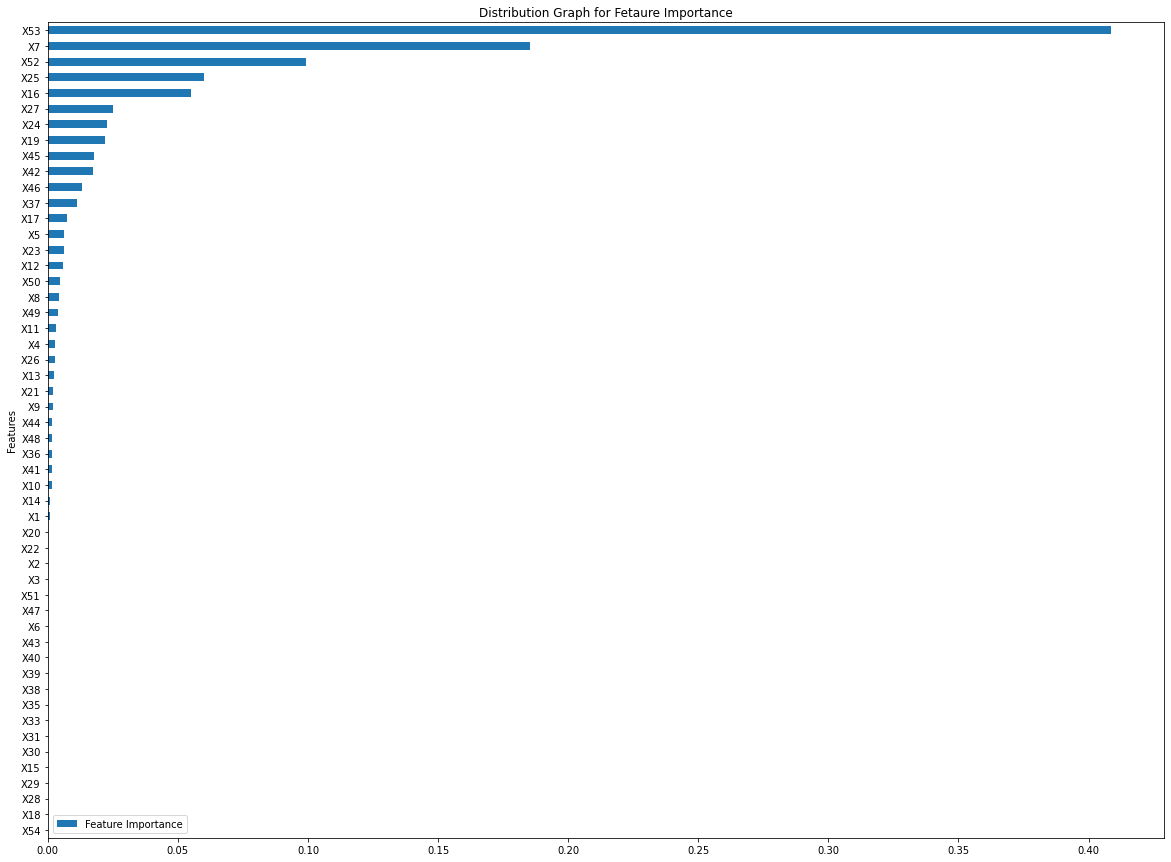

In [22]:
feature_importance_df = pd.DataFrame()
feature_importance_df['Features'] = X_train_scaler_df.columns
feature_importance_df['Feature Importance'] = decision_tree.feature_importances_
feature_importance_df = feature_importance_df.sort_values(by = 'Feature Importance')

# plotting the bar plot for feature importance
feature_importance_df.set_index('Features').plot.barh(figsize = (20,15), title = "Distribution Graph for Fetaure Importance")
plt.ylabel("Features")

As we see that there are many features which is having zero feature importance. So removing such features will not have any negative impact on our model.

In [23]:
# checking the unimportant features
unimportant_features = feature_importance_df[feature_importance_df['Feature Importance'] == 0.0]['Features'].values
unimportant_features

array(['X54', 'X18', 'X28', 'X29', 'X15', 'X30', 'X31', 'X33', 'X35',
       'X38', 'X39', 'X40', 'X43', 'X6', 'X47', 'X51', 'X3', 'X2', 'X22',
       'X20'], dtype=object)

In [24]:
# dropping unimportant features from train, validation and test dataset
X_train_df = X_train_df.drop(unimportant_features, axis = 1)
X_valid_df = X_valid_df.drop(unimportant_features, axis = 1)
X_test = X_test.drop(unimportant_features, axis = 1)

print("Train Dataset Shape :", X_train_df.shape)
print("Validation Dataset Shape :", X_valid_df.shape)
print("Test Dataset Shape :", X_test.shape)

Train Dataset Shape : (3128, 32)
Validation Dataset Shape : (782, 32)
Test Dataset Shape : (691, 32)


# 6. Data Preprocessing

## 6.1 Normalizing the Dataset

In [25]:
# standardizing the train, validation and test dataset
scaler = MinMaxScaler()
scaler.fit(X_train_df.values)

X_train_normalize = scaler.transform(X_train_df.values)
X_valid_normalize = scaler.transform(X_valid_df.values)
X_test_normalize = scaler.transform(X_test.values)

print(X_train_normalize.shape)
print(X_valid_normalize.shape)
print(X_test_normalize.shape)

(3128, 32)
(782, 32)
(691, 32)


# 7. Modelling Machine Learning Algorithms

## 7.1 Navie Bayes

100%|██████████| 6/6 [00:00<00:00, 307.26it/s]


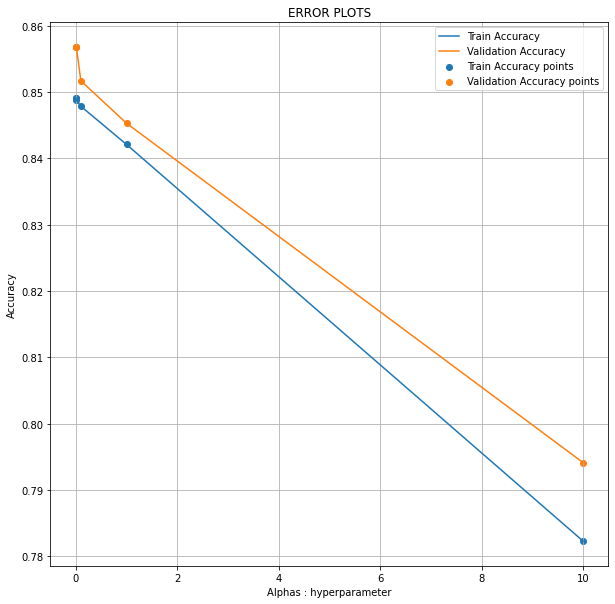

In [26]:
# training Naive Bayes algorithm
train_acc = []
valid_acc = []
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for i in tqdm(alphas):
    naive = MultinomialNB(alpha = i)
    naive.fit(X_train_normalize, y_train)
    
    train_acc.append(naive.score(X_train_normalize, y_train))
    valid_acc.append(naive.score(X_valid_normalize, y_valid))
    
# plotting Train and Validation accuracy
plt.figure(figsize = (10,10))
plt.plot(alphas, train_acc, label='Train Accuracy')
plt.plot(alphas, valid_acc, label='Validation Accuracy')

plt.scatter(alphas, train_acc, label='Train Accuracy points')
plt.scatter(alphas, valid_acc, label='Validation Accuracy points')

plt.legend()
plt.xlabel("Alphas : hyperparameter")
plt.ylabel("Accuracy")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [27]:
# selecting the best hyperparameter 
for i in range(len(alphas)):
    print("For Alpha = {} , Train Accuracy = {} , Validation Accuracy = {}".format(alphas[i],train_acc[i],valid_acc[i]))

For Alpha = 0.0001 , Train Accuracy = 0.8491048593350383 , Validation Accuracy = 0.8567774936061381
For Alpha = 0.001 , Train Accuracy = 0.8491048593350383 , Validation Accuracy = 0.8567774936061381
For Alpha = 0.01 , Train Accuracy = 0.8487851662404092 , Validation Accuracy = 0.8567774936061381
For Alpha = 0.1 , Train Accuracy = 0.8478260869565217 , Validation Accuracy = 0.8516624040920716
For Alpha = 1 , Train Accuracy = 0.842071611253197 , Validation Accuracy = 0.8452685421994884
For Alpha = 10 , Train Accuracy = 0.7822890025575447 , Validation Accuracy = 0.7941176470588235


So, Best Hyperparameter Alpha = 0.01 gives the best accuracy score for train and validation dataset i.e.

Train Accuracy = 84.9104%

Validation Accuracy = 85.6777%

In [28]:
# printing roc_auc_score for train and validation dataset
print("Train AUC Score :", roc_auc_score(y_train, naive.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, naive.predict(X_valid_normalize)))

Train AUC Score : 0.7278395919961484
Validation AUC Score : 0.7406651808674781


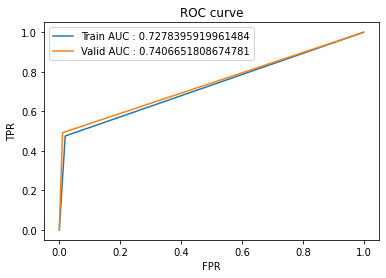

In [29]:
# plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, naive.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, naive.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, naive.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, naive.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## 7.2 Logistic Regression

100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


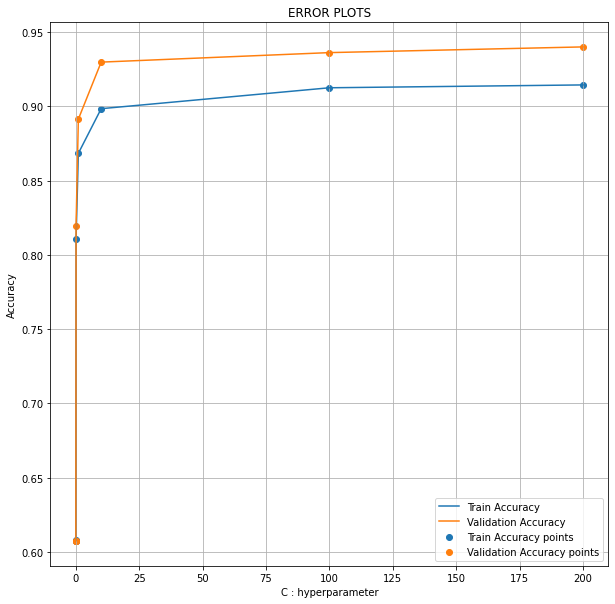

In [32]:
# training logistic regression algorithm
train_acc = []
valid_acc = []
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in tqdm(c):
    log_reg = LogisticRegression(C = i, random_state = 15)
    log_reg.fit(X_train_normalize, y_train)
    
    train_acc.append(log_reg.score(X_train_normalize, y_train))
    valid_acc.append(log_reg.score(X_valid_normalize, y_valid))
    
# plotting Train and Validation accuracy
plt.figure(figsize = (10,10))
plt.plot(c, train_acc, label='Train Accuracy')
plt.plot(c, valid_acc, label='Validation Accuracy')

plt.scatter(c, train_acc, label='Train Accuracy points')
plt.scatter(c, valid_acc, label='Validation Accuracy points')

plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("Accuracy")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [33]:
# selecting the best hyperparameter 
for i in range(len(c)):
    print("For Alpha = {} , Train Accuracy = {} , Validation Accuracy = {}".format(c[i],train_acc[i],valid_acc[i]))

For Alpha = 0.0001 , Train Accuracy = 0.6077365728900256 , Validation Accuracy = 0.6074168797953964
For Alpha = 0.001 , Train Accuracy = 0.6077365728900256 , Validation Accuracy = 0.6074168797953964
For Alpha = 0.01 , Train Accuracy = 0.6083759590792839 , Validation Accuracy = 0.6074168797953964
For Alpha = 0.1 , Train Accuracy = 0.8107416879795396 , Validation Accuracy = 0.819693094629156
For Alpha = 1 , Train Accuracy = 0.8682864450127877 , Validation Accuracy = 0.8913043478260869
For Alpha = 10 , Train Accuracy = 0.8983375959079284 , Validation Accuracy = 0.9296675191815856
For Alpha = 100 , Train Accuracy = 0.9124040920716112 , Validation Accuracy = 0.9360613810741688
For Alpha = 200 , Train Accuracy = 0.9143222506393862 , Validation Accuracy = 0.9398976982097187


So, for Logistic Regression the Hyperparameter C = 200 gives the best accuracy score for train and validation dataset i.e.

Train Accuracy = 91.4322%

Validation Accuracy = 93.9897%

In [34]:
# printing roc_auc_score for train and validation dataset
print("Train AUC Score :", roc_auc_score(y_train, log_reg.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, log_reg.predict(X_valid_normalize)))

Train AUC Score : 0.9052383959542591
Validation AUC Score : 0.9332453283044745


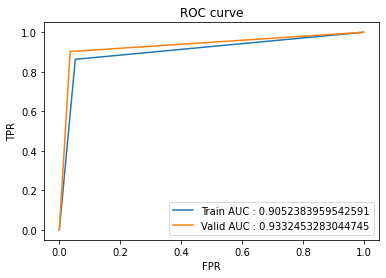

In [35]:
# plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, log_reg.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, log_reg.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, log_reg.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, log_reg.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## 7.3 K-Nearest Neighbor (KNN)

100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


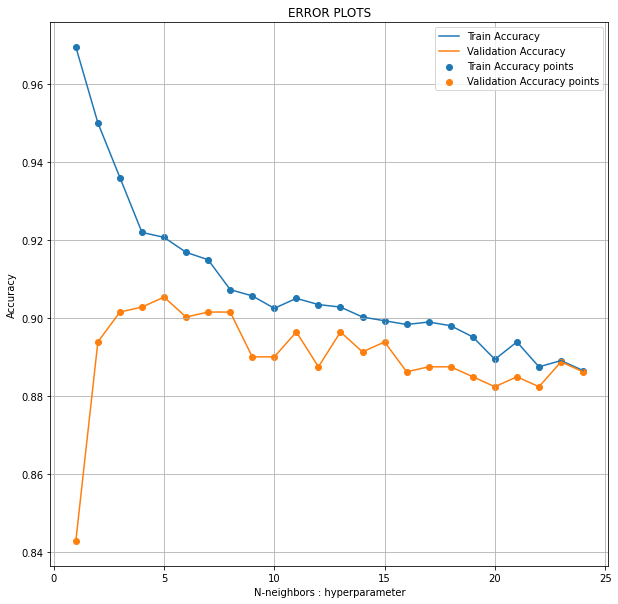

In [36]:
# training K-Nearest Neigbour algorithm
train_acc = []
valid_acc = []
n_neighbors = range(1,25)

for i in tqdm(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(X_train_normalize, y_train)
    
    train_acc.append(knn.score(X_train_normalize, y_train))
    valid_acc.append(knn.score(X_valid_normalize, y_valid))
    
# plotting Train and Validation accuracy
plt.figure(figsize = (10,10))
plt.plot(n_neighbors, train_acc, label='Train Accuracy')
plt.plot(n_neighbors, valid_acc, label='Validation Accuracy')

plt.scatter(n_neighbors, train_acc, label='Train Accuracy points')
plt.scatter(n_neighbors, valid_acc, label='Validation Accuracy points')

plt.legend()
plt.xlabel("N-neighbors : hyperparameter")
plt.ylabel("Accuracy")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [37]:
# selecting the best hyperparameter 
for i in range(len(n_neighbors)):
    print("For K-neighbors = {} , Train Accuracy = {} , Validation Accuracy = {}".format(n_neighbors[i],train_acc[i],valid_acc[i]))

For K-neighbors = 1 , Train Accuracy = 0.9696291560102301 , Validation Accuracy = 0.8427109974424553
For K-neighbors = 2 , Train Accuracy = 0.9501278772378516 , Validation Accuracy = 0.8938618925831202
For K-neighbors = 3 , Train Accuracy = 0.9360613810741688 , Validation Accuracy = 0.90153452685422
For K-neighbors = 4 , Train Accuracy = 0.921994884910486 , Validation Accuracy = 0.9028132992327366
For K-neighbors = 5 , Train Accuracy = 0.9207161125319693 , Validation Accuracy = 0.9053708439897699
For K-neighbors = 6 , Train Accuracy = 0.9168797953964194 , Validation Accuracy = 0.9002557544757033
For K-neighbors = 7 , Train Accuracy = 0.9149616368286445 , Validation Accuracy = 0.90153452685422
For K-neighbors = 8 , Train Accuracy = 0.9072890025575447 , Validation Accuracy = 0.90153452685422
For K-neighbors = 9 , Train Accuracy = 0.905690537084399 , Validation Accuracy = 0.8900255754475703
For K-neighbors = 10 , Train Accuracy = 0.9024936061381074 , Validation Accuracy = 0.89002557544757

So, for K Nearest Neigbour the Hyperparameter n_neighbors = 3 gives the best accuracy score for train and validation dataset which is not overfitting the dataset i.e.

Train Accuracy = 93.6061%

Validation Accuracy = 90.1534%

In [38]:
# printing roc_auc_score for train and validation dataset
print("Train AUC Score :", roc_auc_score(y_train, knn.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, knn.predict(X_valid_normalize)))

Train AUC Score : 0.8723866861991308
Validation AUC Score : 0.8706017486713525


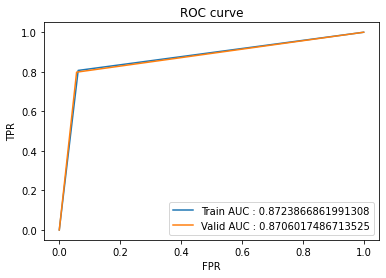

In [39]:
# plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, knn.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, knn.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, knn.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, knn.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## 7.4 Support Vector Machine (SVM)

In [40]:
# hyperparameter tunning the Support Vector Classifier (SVC) algorithm
parameters = {'kernel': ('linear', 'rbf'), 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100]}

svc = SVC(random_state = 15)

clf = GridSearchCV(svc, parameters, scoring = "accuracy", n_jobs = -1, return_train_score = True)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'C': 10, 'kernel': 'rbf'}


In [45]:
# training SVC with the best hyperparameter 
svc = SVC(C = 10, kernel = 'rbf', random_state = 10)
svc.fit(X_train_normalize, y_train)
print("In SVC for Best Parameter :", search.best_params_)
print("Train Accuracy :", svc.score(X_train_normalize, y_train))
print("Validation Accuracy :", svc.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, svc.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, svc.predict(X_valid_normalize)))

In SVC for Best Parameter : {'max_depth': 10, 'min_samples_split': 5}
Train Accuracy : 0.9571611253196931
Validation Accuracy : 0.9398976982097187

Train AUC Score : 0.9524747194780596
Validation AUC Score : 0.939005657466141


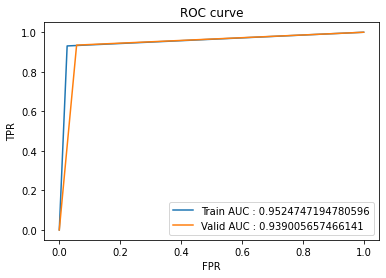

In [46]:
# plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, svc.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, svc.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, svc.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, svc.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## 7.5 Decision Tree 

In [47]:
# hyperparameter tunning the Decision Tree Classifier algorithm
decision_tree = DecisionTreeClassifier(random_state = 15)
parameters = {"max_depth" : [1, 5, 10, 25, 50, 75, 100], "min_samples_split" : [1, 5, 10, 25, 50, 100, 250, 500]}
clf = GridSearchCV(decision_tree, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'max_depth': 10, 'min_samples_split': 5}


In [48]:
# training Decision Tree Classifier algorithm with the best hyperparameter 
decision_tree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 15)
decision_tree.fit(X_train_normalize, y_train)
print("In Decision Tree for Best Parameter :", search.best_params_)
print("Train Accuracy :", decision_tree.score(X_train_normalize, y_train))
print("Validation Accuracy :", decision_tree.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, decision_tree.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, decision_tree.predict(X_valid_normalize)))

In Decision Tree for Best Parameter : {'max_depth': 10, 'min_samples_split': 5}
Train Accuracy : 0.9635549872122762
Validation Accuracy : 0.9322250639386189

Train AUC Score : 0.9577351087468655
Validation AUC Score : 0.9292336704954569


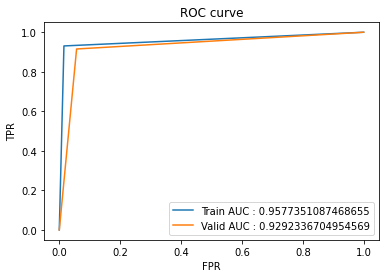

In [49]:
# plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, decision_tree.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, decision_tree.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, decision_tree.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, decision_tree.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## 7.6 Random Forest

In [50]:
# hyperparameter tunning the Random Forest Classifier algorithm
random_forest = RandomForestClassifier(random_state = 15, n_jobs = -1)
parameters = {"n_estimators" : [5, 10, 15, 20 ,25, 50, 100, 250], 
              "max_depth" : [1, 5, 10, 15, 20 ,25, 50, 100], 
              "min_samples_split" : [1, 5, 10, 25, 50, 100]}
clf = GridSearchCV(random_forest, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 50}


In [53]:
# training Random Forest Classifier algorithm with the best hyperparameter 
random_forest = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_split = 50, random_state = 15)
random_forest.fit(X_train_normalize, y_train)
print("In Random Forest for Best Parameter :", search.best_params_)
print("Train Accuracy :", random_forest.score(X_train_normalize, y_train))
print("Validation Accuracy :", random_forest.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, random_forest.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, random_forest.predict(X_valid_normalize)))

In Random Forest for Best Parameter : {'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 50}
Train Accuracy : 0.9251918158567775
Validation Accuracy : 0.9309462915601023

Train AUC Score : 0.9102801382363419
Validation AUC Score : 0.9201165780901766


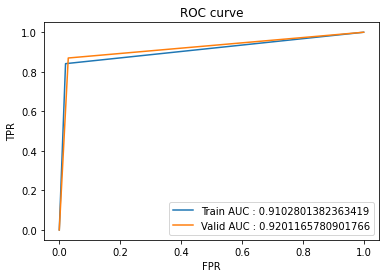

In [54]:
# plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, random_forest.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, random_forest.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, random_forest.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, random_forest.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## 7.7 Extreme Gradient Boosting (XGBoost)

In [55]:
# hyperparameter tunning the XGBoost Classifier algorithm
xgb_classifier = XGBClassifier(random_state = 15, n_jobs = -1)
parameters = {"n_estimators" : [5, 10, 15, 20 ,25, 50, 100, 250], 
              "max_depth" : [1, 5, 10, 15, 20 ,25, 50, 100], 
              "min_samples_split" : [1, 5, 10, 25, 50, 100]}
clf = GridSearchCV(xgb_classifier, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'max_depth': 50, 'min_samples_split': 1, 'n_estimators': 100}


In [56]:
# training XGBoost Classifier algorithm with the best hyperparameter 
xgb_classifier = XGBClassifier(n_estimators = 100, max_depth = 50, min_samples_split = 1, random_state = 15)
xgb_classifier.fit(X_train_normalize, y_train)
print("In XGBoost Classifier for Best Parameter :", search.best_params_)
print("Train Accuracy :", xgb_classifier.score(X_train_normalize, y_train))
print("Validation Accuracy :", xgb_classifier.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, xgb_classifier.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, xgb_classifier.predict(X_valid_normalize)))

In XGBoost Classifier for Best Parameter : {'max_depth': 50, 'min_samples_split': 1, 'n_estimators': 100}
Train Accuracy : 0.9968030690537084
Validation Accuracy : 0.9501278772378516

Train AUC Score : 0.9959250203748982
Validation AUC Score : 0.948578775930053


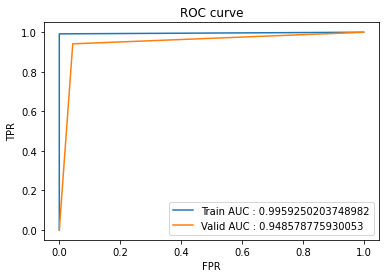

In [57]:
# plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, xgb_classifier.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, xgb_classifier.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, xgb_classifier.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, xgb_classifier.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# 8. Summary

In [58]:
from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Train Accuracy", "Valid Accuracy", "Train AUC", "Validation AUC"])

# adding rows
myTable.add_row(["Navie Bayes", "84.9104%", "85.6777%", "0.7278", "0.7406"])
myTable.add_row(["Logistic Regression", "91.4322%", "93.9897%", "0.9052", "0.9332"])
myTable.add_row(["K-Nearest Neigbour (KNN)", "93.6061%", "90.1534%", "0.8723", "0.8706"])
myTable.add_row(["Suport Vector Classifier (SVC)", "95.7161%", "93.9897%", "0.9524", "0.9390"])
myTable.add_row(["Decision Tree", "96.3554%", "93.2225%", "0.9577", "0.9292"])
myTable.add_row(["Random Forest", "92.5191%", "93.0946%", "0.9102", "0.9201"])
myTable.add_row(["XGBoost", "99.6803%", "95.0127%", "0.9959", "0.9485"])

print(myTable)

+--------------------------------+----------------+----------------+-----------+----------------+
|             Model              | Train Accuracy | Valid Accuracy | Train AUC | Validation AUC |
+--------------------------------+----------------+----------------+-----------+----------------+
|          Navie Bayes           |    84.9104%    |    85.6777%    |   0.7278  |     0.7406     |
|      Logistic Regression       |    91.4322%    |    93.9897%    |   0.9052  |     0.9332     |
|    K-Nearest Neigbour (KNN)    |    93.6061%    |    90.1534%    |   0.8723  |     0.8706     |
| Suport Vector Classifier (SVC) |    95.7161%    |    93.9897%    |   0.9524  |     0.9390     |
|         Decision Tree          |    96.3554%    |    93.2225%    |   0.9577  |     0.9292     |
|         Random Forest          |    92.5191%    |    93.0946%    |   0.9102  |     0.9201     |
|            XGBoost             |    99.6803%    |    95.0127%    |   0.9959  |     0.9485     |
+-------------------

From the abve table we can see that XGBoost gives the best Accuracy and AUC Score. So we will be using XGBoost classifier algorithm for predicting the Test Dataset output. 

# 9. Testing Best Model

In [60]:
xgb_classifier = XGBClassifier(n_estimators = 100, max_depth = 50, min_samples_split = 1, random_state = 15)
xgb_classifier.fit(X_train_normalize, y_train)
y_test_predict = xgb_classifier.predict(X_test_normalize)
y_test_predict

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [61]:
# saving the predicted output value of Test dataset
submission = pd.DataFrame()
submission['y_test_predict'] = y_test_predict
submission.to_csv("submission.csv", index=False)